In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.version

'3.8.3 (default, Jul  2 2020, 16:21:59) \n[GCC 7.3.0]'

In [3]:
data = pd.read_csv('Datasets/HouseholdWaste.csv')

# PREPROCESSING

In [4]:
# Some data exploration

print(data.dtypes)
data

FeatureCode         object
DateCode             int64
Measurement         object
Units               object
Value                int64
Waste Management    object
Waste Category      object
dtype: object


,FeatureCode,DateCode,Measurement,Units,Value,Waste Management,Waste Category
0,S12000041,2011,Count,Tonnes,250,Waste Generated,Textile wastes
1,S12000011,2011,Count,Tonnes,0,Other Diversion,Plastic wastes
2,S12000005,2011,Count,Tonnes,0,Other Diversion (pre 2014 method),Combustion wastes
3,S12000005,2011,Ratio,Percentage,52,Recycled (pre 2014 method),Total Waste
4,S12000011,2011,Count,Tonnes,0,Waste Generated,Combustion wastes
...,...,...,...,...,...,...,...
37747,S12000034,2018,Count,Tonnes,418,Landfilled,Combustion wastes
37748,S12000035,2018,Count,Tonnes,0,Recycled,Health care and biological wastes
37749,S12000041,2018,Ratio,Percentage,41,Other Diversion (pre 2014 method),Total Waste
37750,S12000041,2018,Count,Tonnes,0,Other Diversion (pre 2014 method),Health care and biological wastes


In [5]:
# From the column 'Measurement' we select only the 'Count' rows
# From the column 'Units' we select only the 'Tonnes' rows
# From the colum 'DateCode' we select only the '2018' rows

data = data[data['Measurement'].str.match('Count')]
data = data[data['Units'].str.match('Tonnes')]

#options = ['2018']
#data = data[data['DateCode'].isin(options)]


# We can now drop the three columns as they don't contain additional info

data.drop('Units', axis=1, inplace=True)
data.drop('Measurement', axis=1, inplace=True)
#data.drop('DateCode', axis=1, inplace=True)

# Rename Waste Category entries

data['Waste Category'] = data['Waste Category'].replace(['Discarded equipment (excluding discarded vehicles, batteries and accumulators wastes)'],'Discarded equipment')
data['Waste Category'] = data['Waste Category'].replace(['Combustion wastes'],'Combustion')
data['Waste Category'] = data['Waste Category'].replace(['Vegetal wastes'],'Vegetal')
data['Waste Category'] = data['Waste Category'].replace(['Plastic wastes'],'Plastics')
data['Waste Category'] = data['Waste Category'].replace(['Animal and mixed food waste'],'Animal and mixed food')
data['Waste Category'] = data['Waste Category'].replace(['Wood wastes'],'Wood')
data['Waste Category'] = data['Waste Category'].replace(['Chemical wastes'],'Chemical')
data['Waste Category'] = data['Waste Category'].replace(['Mineral waste from construction and demolition'],'Mineral')
data['Waste Category'] = data['Waste Category'].replace(['Rubber wastes'],'Rubber')
data['Waste Category'] = data['Waste Category'].replace(['Household and similar wastes'],'Household and similar')
data['Waste Category'] = data['Waste Category'].replace(['Glass wastes'],'Glass')
data['Waste Category'] = data['Waste Category'].replace(['Paper and cardboard wastes'],'Paper and cardboard')
data['Waste Category'] = data['Waste Category'].replace(['Textile wastes'],'Textile')
data['Waste Category'] = data['Waste Category'].replace(['Batteries and accumulators wastes'],'Batteries and accumulators')
data['Waste Category'] = data['Waste Category'].replace(['Health care and biological wastes'],'Health care and biological')



# Rename FeatureCode entries

data['FeatureCode'] = data['FeatureCode'].replace(['S12000033'],'Aberdeen City')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000034'],'Aberdeenshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000041'],'Angus')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000035'],'Argyll and Bute')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000036'],'City of Edinburgh')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000005'],'Clackmannanshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000006'],'Dumfries and Galloway')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000042'],'Dundee City')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000008'],'East Ayrshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000045'],'East Dunbartonshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000010'],'East Lothian')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000011'],'East Renfrewshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000014'],'Falkirk')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000047'],'Fife')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000049'],'Glasgow City')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000017'],'Highland')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000018'],'Inverclyde')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000019'],'Midlothian')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000020'],'Moray')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000013'],'Na h-Eileanan Siar')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000021'],'North Ayrshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000050'],'North Lanarkshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000023'],'Orkney Islands')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000048'],'Perth and Kinross')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000038'],'Renfrewshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000026'],'Scottish Borders')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000027'],'Shetland Islands')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000028'],'South Ayrshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000029'],'South Lanarkshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000030'],'Stirling')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000039'],'West Dunbartonshire')
data['FeatureCode'] = data['FeatureCode'].replace(['S12000040'],'West Lothian')


# To simplify the analysis we reduce the waste management type 
# to three options (merging the pre 2014 categories): 
# Recycled, Landfilled, Other Diversion

data['Waste Management'] = data['Waste Management'].replace(['Recycled (pre 2014 method)'], 'Recycled')
data['Waste Management'] = data['Waste Management'].replace(['Other Diversion (pre 2014 method)'], 'Other Diversion')

# Merge the 'Metallic' category

data['Waste Category'] = data['Waste Category'].replace(['Metallic wastes, non-ferrous', 'Metallic wastes, mixed ferrous and non-ferrous', 'Metallic wastes, ferrous'], 'Metallic')



# To further simplify the analysis we drop any row with zero values
# We also drop the 'Total Waste' and 'Waste Generated' waste category, 
# and the country-wide numbers


data = data[(data!= 0).all(1)]
data = data[(data!= 'Total Waste').all(1)]
data = data[(data!= 'S92000003').all(1)]
data = data[(data!= 'Waste Generated').all(1)]


# Reorder dataframe columns so class is the first column

cols = data.columns.tolist()
cols = ['Waste Management', 'Value', 'FeatureCode', 'DateCode', 'Waste Category']

data = data[cols]

data

# Now the dataframe contains:

# FEATURE CODE:         Geographical location in Scotland
#                       i.e 32 Council Areas
# DATE CODE:            Years from 2011 to 2018
# VALUE:                Tonnes of Waste category for each magement method
# WASTE MANAGEMENT:     Way the waste has been dealt with ('Recycled', 'Landfilled', 'Other Diversion')
# WASTE CATEGORY:       Type of waste, 21 different types                    

/home/anna/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Waste Management,Value,FeatureCode,DateCode,Waste Category
5,Recycled,6,Angus,2011,Chemical
15,Recycled,1024,Clackmannanshire,2011,Soils
17,Recycled,61,Fife,2011,Used oils
19,Recycled,85,Fife,2011,Metallic
20,Recycled,924,Moray,2011,Metallic
...,...,...,...,...,...
37737,Recycled,158,Moray,2018,Household and similar
37739,Recycled,2,Moray,2018,Batteries and accumulators
37743,Recycled,53,East Ayrshire,2018,Household and similar
37744,Recycled,100,Dundee City,2018,Textile


In [6]:
data['Waste Management'].unique()

array(['Recycled', 'Other Diversion', 'Landfilled'], dtype=object)

In [7]:
data['FeatureCode'].nunique()

32

In [8]:
data['DateCode'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [9]:
data['Waste Category'].nunique()

20

# SUMMARY STATISTICS

In [10]:
# Questions:
# Which councils recycle the most?
# Which councils recycle the least?
# What is the most landfilled type of waste?
# What is the largest type of waste produced?
# Can you predict whether it will be recycled or not based on attributes?
# 

In [11]:
# Most recent data

options = ['2018']
data2018 = data[data['DateCode'].isin(options)]

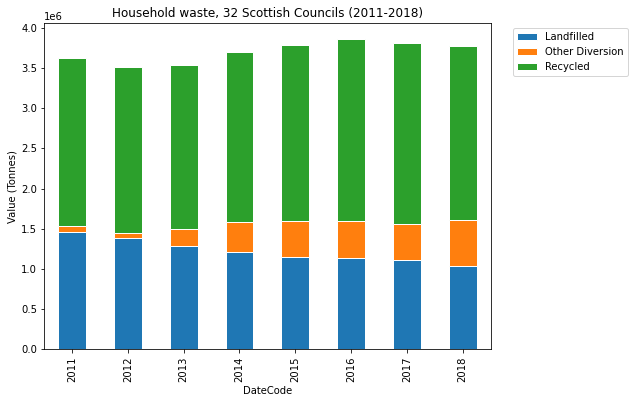

In [12]:
# Total waste generated over the years

TotalByYear = data.groupby(['DateCode', 'Waste Management'])['Value'].sum().unstack()


TotalByYear.plot(kind='bar', figsize=(8, 6), stacked=True, edgecolor='white')
plt.ylabel('Value (Tonnes)')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', ncol=1)
plt.title('Household waste, 32 Scottish Councils (2011-2018)')
#plt.grid()
plt.show()

In [13]:
TotalByYear

Waste Management,Landfilled,Other Diversion,Recycled
DateCode,,,
2011,1453788,75394,2090026
2012,1382155,68562,2058296
2013,1290829,209022,2036410
2014,1212484,366574,2126206
2015,1150532,442259,2193620
2016,1131809,470561,2262854
2017,1106959,452213,2253987
2018,1031465,578727,2167350


In [14]:
data.groupby(['DateCode', 'Waste Management'])['Value'].describe()

count          mean           std   min       25%  \
DateCode Waste Management                                                       
2011     Landfilled          38.0  38257.578947  41007.711663   6.0  12668.25   
         Other Diversion     38.0   1984.052632   4412.479507   2.0     47.25   
         Recycled          1046.0   1998.112811   3753.253616   1.0     44.00   
2012     Landfilled          59.0  23426.355932  34451.290593   1.0    203.50   
         Other Diversion     30.0   2285.400000   4236.352445  14.0     31.25   
         Recycled          1058.0   1945.459357   3590.385430   1.0     42.00   
2013     Landfilled          95.0  13587.673684  27442.182736   1.0     60.00   
         Other Diversion     98.0   2132.877551   3905.086504   1.0    109.00   
         Recycled          1022.0   1992.573386   3540.201126   1.0     52.00   
2014     Landfilled         116.0  10452.448276  24488.918254   1.0     56.50   
         Other Diversion    151.0   2427.642384   5538.111421   1.0     80.00   
         Recycled          1005.0   2115.627861   3675.613191   1.0     66.00   
2015     Landfilled         122.0   9430.590164  22893.462011   1.0     54.00   
         Other Diversion    158.0   2799.107595   5410.429955   1.0     89.25   
         Recycled          1023.0   2144.301075   3654.862187   1.0     63.50   
2016     Landfilled         129.0   8773.713178  21910.572362   1.0     41.00   
         Other Diversion    155.0   3035.877419   5666.346099   1.0    136.00   
         Recycled          1020.0   2218.484314   3672.974875   1.0     67.00   
2017     Landfilled         127.0   8716.212598  22127.089122   1.0     49.00   
         Other Diversion    148.0   3055.493243   5130.582772   1.0    301.75   
         Recycled          1029.0   2190.463557   3616.460555   1.0     59.00   
2018     Landfilled         130.0   7934.346154  21042.175018   1.0     67.00   
         Other Diversion    168.0   3444.803571   5645.674363   1.0    136.00   
         Recycled          1038.0   2088.005780   3354.864985   1.0     66.25   

                               50%       75%       max  
DateCode Waste Management                               
2011     Landfilled        28166.0  41114.25  183691.0  
         Other Diversion     122.0   1615.25   18881.0  
         Recycled            563.0   2069.75   33698.0  
2012     Landfilled         9541.0  31631.00  165096.0  
         Other Diversion     152.0   3580.50   16108.0  
         Recycled            544.0   2114.00   32600.0  
2013     Landfilled          416.0  21405.50  162542.0  
         Other Diversion     661.0   2395.00   21931.0  
         Recycled            573.0   2240.00   31274.0  
2014     Landfilled          282.0   7206.00  161342.0  
         Other Diversion     416.0   1809.00   33193.0  
         Recycled            652.0   2448.00   33469.0  
2015     Landfilled          331.5   4154.50  159456.0  
         Other Diversion     530.5   2772.00   33891.0  
         Recycled            699.0   2693.00   32255.0  
2016     Landfilled          288.0   3703.00  154641.0  
         Other Diversion     746.0   3339.50   33806.0  
         Recycled            695.0   2831.00   31223.0  
2017     Landfilled          288.0   3694.00  149462.0  
         Other Diversion     797.0   4239.25   29961.0  
         Recycled            680.0   2938.00   31006.0  
2018     Landfilled          365.0   2910.25  162384.0  
         Other Diversion     738.0   4271.75   28111.0  
         Recycled            655.0   2714.75   27970.0

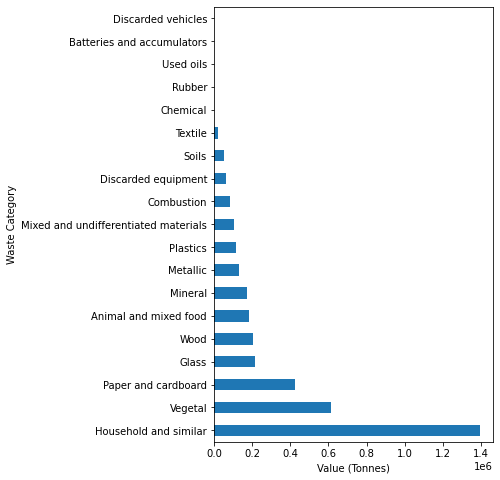

In [15]:
# Most abundant waste by type year 2018

TotalByType = data2018.groupby(['Waste Category'])['Value'].sum()

ind2 = TotalByType.sort_values(ascending=False).index.to_list()

TotalByType[ind2].plot(kind='barh', figsize=(5, 8))
plt.xlabel('Value (Tonnes)')
plt.show()

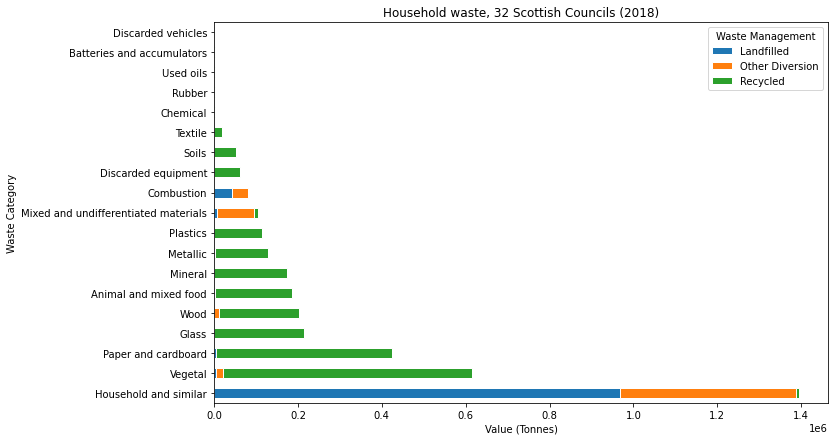

In [16]:
a=data2018.groupby(['Waste Category', 'Waste Management'])['Value'].sum().unstack()

a.reindex(ind2).plot(kind='barh',figsize=(11, 7),edgecolor='white', stacked=True)
plt.xlabel('Value (Tonnes)')
plt.title('Household waste, 32 Scottish Councils (2018)')
plt.show()

In [17]:
data2018.groupby(['Waste Category', 'Waste Management'])['Value'].describe()

count          mean  \
Waste Category                       Waste Management                        
Animal and mixed food                Landfilled         10.0    173.100000   
                                     Other Diversion     3.0    136.333333   
                                     Recycled           63.0   2900.523810   
Batteries and accumulators           Recycled           54.0     19.407407   
Chemical                             Landfilled          1.0      6.000000   
                                     Other Diversion     2.0     70.000000   
                                     Recycled           40.0     42.850000   
Combustion                           Landfilled         27.0   1624.481481   
                                     Other Diversion    28.0   1359.500000   
Discarded equipment                  Landfilled          8.0     88.000000   
                                     Recycled           64.0    967.156250   
Discarded vehicles                   Recycled           26.0     28.076923   
Glass                                Landfilled          4.0      8.500000   
                                     Recycled           64.0   3355.656250   
Household and similar                Landfilled         32.0  30251.343750   
                                     Other Diversion    58.0   7221.931034   
                                     Recycled           34.0    206.235294   
Metallic                             Landfilled          1.0      4.000000   
                                     Other Diversion    18.0    137.444444   
                                     Recycled          182.0    694.043956   
Mineral                              Landfilled          2.0     49.500000   
                                     Recycled           54.0   3221.592593   
Mixed and undifferentiated materials Landfilled         24.0    334.750000   
                                     Other Diversion    36.0   2445.777778   
                                     Recycled           26.0    345.769231   
Paper and cardboard                  Landfilled          6.0    827.166667   
                                     Recycled           64.0   6535.031250   
Plastics                             Recycled           64.0   1768.281250   
Rubber                               Other Diversion     2.0      7.000000   
                                     Recycled           36.0     46.222222   
Soils                                Landfilled          1.0     11.000000   
                                     Recycled           28.0   1848.857143   
Textile                              Landfilled          5.0     11.200000   
                                     Recycled           64.0    312.843750   
Used oils                            Recycled           56.0     23.250000   
Vegetal                              Landfilled          8.0    489.250000   
                                     Other Diversion    14.0   1310.071429   
                                     Recycled           61.0   9703.442623   
Wood                                 Landfilled          1.0      5.000000   
                                     Other Diversion     7.0   1766.142857   
                                     Recycled           58.0   3277.637931   

                                                                std    min  \
Waste Category                       Waste Management                        
Animal and mixed food                Landfilled          258.565466   20.0   
                                     Other Diversion     178.978583   33.0   
                                     Recycled           2148.887491    1.0   
Batteries and accumulators           Recycled             17.563382    2.0   
Chemical                             Landfilled                 NaN    6.0   
                                     Other Diversion       0.000000   70.0   
                                     Recycled            104.184390    2.0  

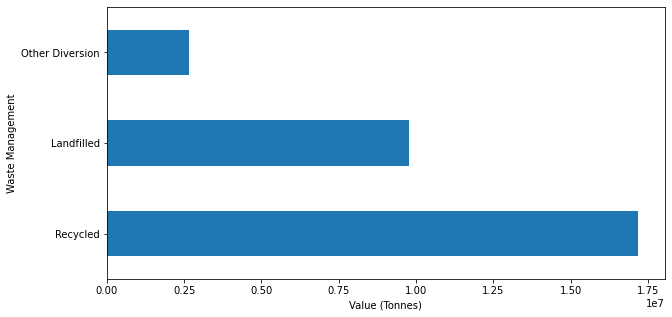

In [18]:
# Most common management method over the years

TotalByMethod = data.groupby(['Waste Management'])['Value'].sum()


TotalByMethod.sort_values(ascending=False).plot(kind='barh', figsize=(10, 5))
plt.xlabel('Value (Tonnes)')
plt.show()

In [19]:
TotalByMethod

Waste Management
Landfilled          9760021
Other Diversion     2663312
Recycled           17188749
Name: Value, dtype: int64

In [20]:
# Most common management method 2018

#TotalByMethod2018 = data2018.groupby(['Waste Management'])['Value'].sum()


#TotalByMethod2018.sort_values(ascending=False).plot(kind='barh', figsize=(10, 5))
#plt.xlabel('Value (Tonnes)')
#plt.show()

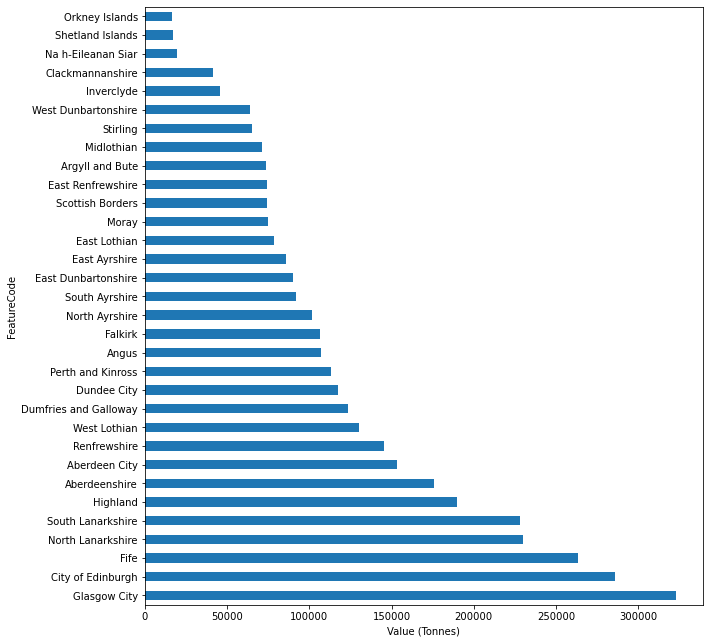

In [21]:
# Total waste in tonnes by council over the years

TotalByCouncil = data2018.groupby(['FeatureCode'])['Value'].sum()

ind = TotalByCouncil.sort_values(ascending=False).index.to_list()

TotalByCouncil[ind].plot(kind='barh',figsize=(10, 11))
plt.xlabel('Value (Tonnes)')
plt.show()

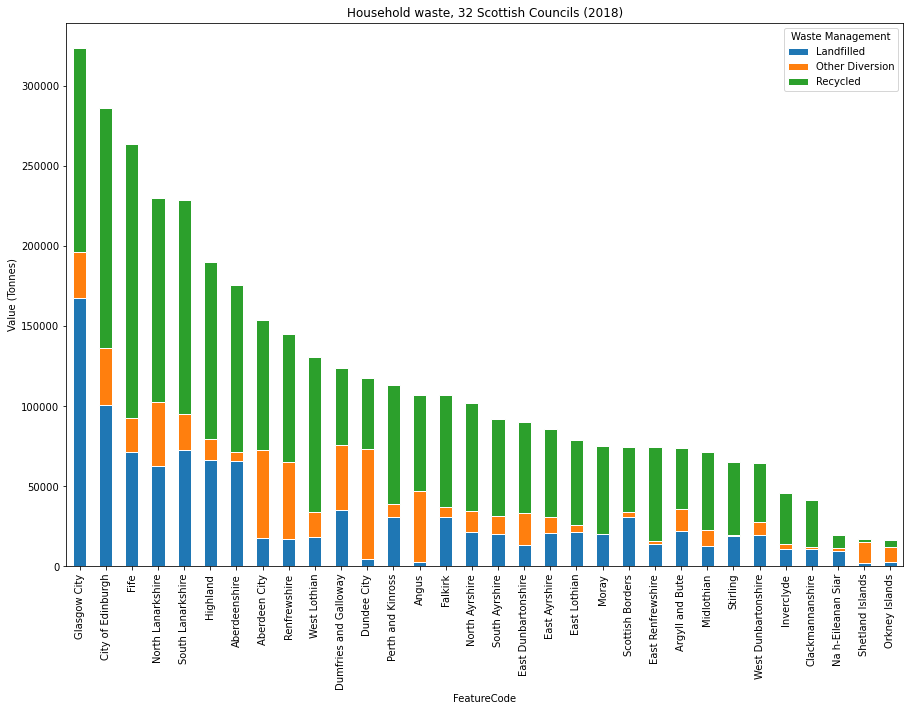

In [22]:
# National data councils view

a=data2018.groupby(['FeatureCode', 'Waste Management'])['Value'].sum().unstack()

a.reindex(ind).plot(kind='bar',figsize=(15, 10), edgecolor='white',stacked=True)
plt.ylabel('Value (Tonnes)')
plt.title('Household waste, 32 Scottish Councils (2018)')

plt.show()

In [23]:
data2018.groupby(['FeatureCode', 'Waste Management'])['Value'].describe()

count          mean           std  \
FeatureCode         Waste Management                                      
Aberdeen City       Landfilled          3.0   5872.666667   5427.644087   
                    Other Diversion     8.0   6859.250000  10004.061786   
                    Recycled           32.0   2530.250000   3635.501501   
Aberdeenshire       Landfilled          2.0  32718.000000  45679.098065   
                    Other Diversion     6.0    927.666667    980.977608   
...                                     ...           ...           ...   
West Dunbartonshire Other Diversion     9.0    869.888889   1503.090021   
                    Recycled           26.0   1409.692308   1513.723218   
West Lothian        Landfilled          8.0   2265.500000   5431.870291   
                    Other Diversion     6.0   2576.666667   3148.713557   
                    Recycled           36.0   2685.555556   3223.617209   

                                        min       25%      50%       75%  \
FeatureCode         Waste Management                                       
Aberdeen City       Landfilled         13.0   3445.00   6877.0   8802.50   
                    Other Diversion   725.0    841.25   1854.0   7872.00   
                    Recycled           26.0    224.50    922.5   3346.50   
Aberdeenshire       Landfilled        418.0  16568.00  32718.0  48868.00   
                    Other Diversion     2.0    162.00    642.0   1764.75   
...                                     ...       ...      ...       ...   
West Dunbartonshire Other Diversion     5.0     54.00    217.0    245.00   
                    Recycled           56.0    125.00    745.0   2147.00   
West Lothian        Landfilled          7.0     14.00    132.0    804.75   
                    Other Diversion     1.0    286.00   1141.0   5226.25   
                    Recycled            4.0     53.00   1360.0   4565.00   

                                          max  
FeatureCode         Waste Management           
Aberdeen City       Landfilled        10728.0  
                    Other Diversion   23004.0  
                    Recycled          12885.0  
Aberdeenshire       Landfilled        65018.0  
                    Other Diversion    2139.0  
...                                       ...  
West Dunbartonshire Other Diversion    3516.0  
                    Recycled           4304.0  
West Lothian        Landfilled        15636.0  
                    Other Diversion    6588.0  
                    Recycled           9841.0  

[95 rows x 8 columns]

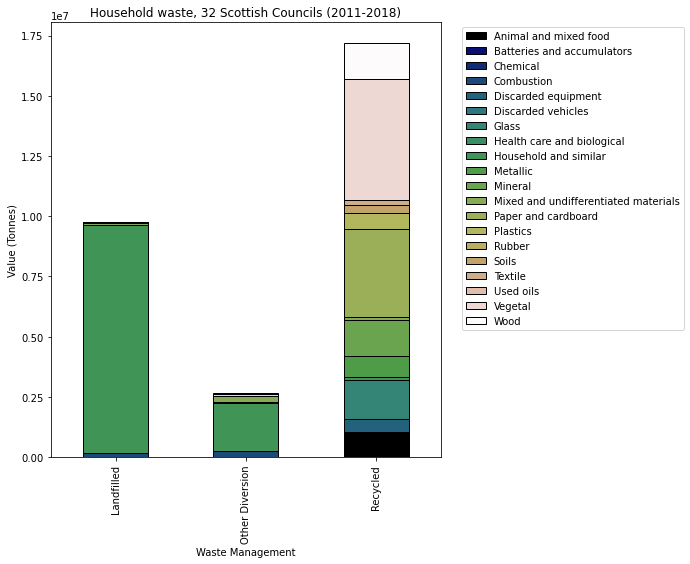

In [24]:
# National data Waste Management view

a=data.groupby([ 'Waste Management', 'Waste Category',])['Value'].sum().unstack()

a.plot(kind='bar',figsize=(7, 8), edgecolor='black',stacked=True, colormap="gist_earth")
plt.ylabel('Value (Tonnes)')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', ncol=1)
plt.title('Household waste, 32 Scottish Councils (2011-2018)')
plt.show() 

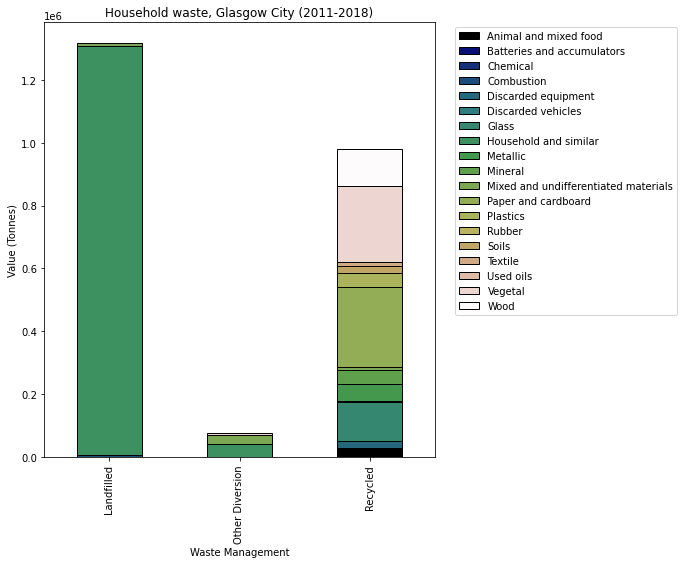

In [25]:
# Glasgow data

options = ['Glasgow City']
glasgow =  data[data['FeatureCode'].isin(options)]
 
#a=glasgow.groupby(['FeatureCode', 'Waste Management'])['Value'].sum().unstack()

#a.plot(kind='bar',figsize=(5, 5), edgecolor='white')
#plt.ylabel('Value (Tonnes)')
#plt.show()    

a=glasgow.groupby([ 'Waste Management', 'Waste Category',])['Value'].sum().unstack()

a.plot(kind='bar',figsize=(7, 8), edgecolor='black',stacked=True, colormap="gist_earth")
plt.ylabel('Value (Tonnes)')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', ncol=1)
plt.title('Household waste, Glasgow City (2011-2018)')
plt.show() 

# CLUSTERING

In [26]:
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

In [27]:
# HIERARCHICAL CLUSTERING

In [28]:
# Bin continuous 'Value' variable into 10 groups

data['Value'] = pd.qcut(data['Value'], q=10)

In [29]:
# Split data in attributes and outcome

wasteData = data[[ 'Value', 'FeatureCode', 'DateCode', 'Waste Category']]   #attributes
wasteTarget = data['Waste Management']      #outcome

# Encode attributes with one-hot encoding

one_hot_wasteData = pd.get_dummies(wasteData)
one_hot_wasteData = one_hot_wasteData.values

# Encode outcome

Y = LabelEncoder().fit_transform(wasteTarget)

#1 = Other
#2 = Recycled
#0 = Landfilled

In [30]:
pd.get_dummies(wasteData)

,DateCode,"Value_(0.999, 10.0]","Value_(10.0, 34.0]","Value_(34.0, 111.6]","Value_(111.6, 284.0]","Value_(284.0, 609.0]","Value_(609.0, 1083.0]","Value_(1083.0, 2008.0]","Value_(2008.0, 3416.6]","Value_(3416.6, 7445.2]",...,Waste Category_Mineral,Waste Category_Mixed and undifferentiated materials,Waste Category_Paper and cardboard,Waste Category_Plastics,Waste Category_Rubber,Waste Category_Soils,Waste Category_Textile,Waste Category_Used oils,Waste Category_Vegetal,Waste Category_Wood
5,2011,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2011,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17,2011,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19,2011,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,2011,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37737,2018,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37739,2018,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37743,2018,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37744,2018,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Scale attribute data?

X = scale(one_hot_wasteData)
X.shape

(10003, 63)

In [32]:
n_samples, n_features = X.shape
n_digits = len(np.unique(Y))
aff = ["euclidean", "l1", "l2", "manhattan"]
link = ["ward", "complete", "average"]
silhouette = []
completeness = []
homogeneity = []
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
            continue
        else:
            print(a,l)
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(X)
            silhouette.append(metrics.silhouette_score(X, model.labels_))
            completeness.append(metrics.completeness_score(Y, model.labels_))
            homogeneity.append(metrics.homogeneity_score(Y, model.labels_))

euclidean ward
euclidean complete
euclidean average
l1 complete
l1 average
l2 complete
l2 average
manhattan complete
manhattan average


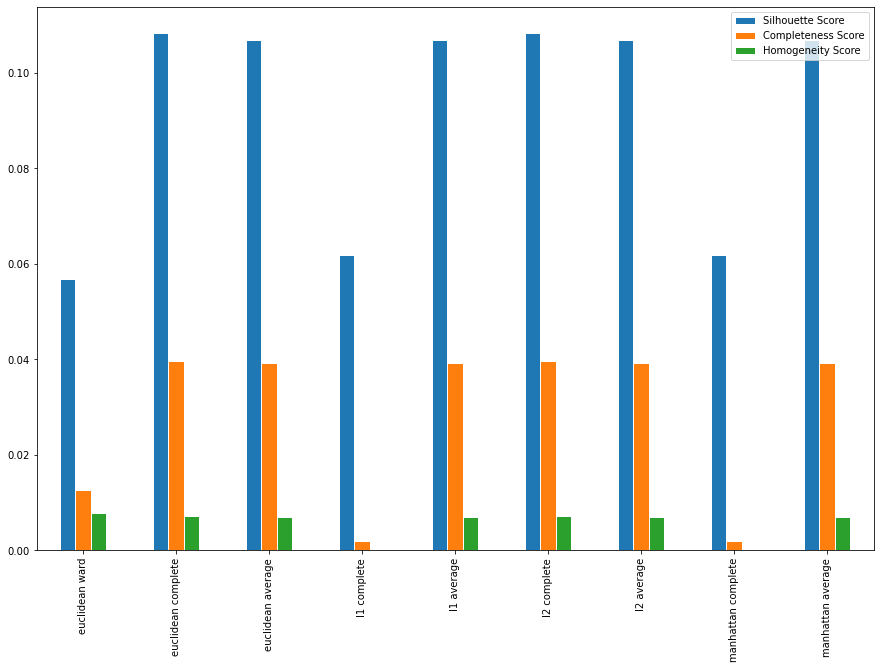

In [33]:
x = {'Silhouette Score': silhouette,
    'Completeness Score': completeness,
    'Homogeneity Score': homogeneity}

df = pd.DataFrame(x, columns = ['Silhouette Score', 'Completeness Score', 'Homogeneity Score'], index = ['euclidean ward', 'euclidean complete', 'euclidean average', 'l1 complete', 'l1 average', 'l2 complete', 'l2 average', 'manhattan complete', 'manhattan average'])

df.plot(kind='bar', figsize=(15, 10), edgecolor='white')

In [34]:
# K-MEANS
# Can you cluster by geographical or time information?
# Can you cluster by management strategy?


In [35]:
# Split data in attributes and outcome

wasteData = data[[ 'Value', 'FeatureCode', 'DateCode', 'Waste Category']]   #attributes
wasteTarget = data['Waste Management']      #outcome

# Encode attributes with one-hot encoding

one_hot_wasteData = pd.get_dummies(wasteData)
one_hot_wasteData = one_hot_wasteData.values

# Encode outcome

Y = LabelEncoder().fit_transform(wasteTarget)

#1 = Other
#2 = Recycled
#0 = Landfilled

In [36]:
# Scale attribute data

X = scale(one_hot_wasteData)
X.shape

(10003, 63)

In [45]:
#Completeness: all the data points that are members of a given class are elements of the same cluster.
#Homogeneity: all of the clusters contain only data points which are members of a single class.

In [46]:
# Build model and apply it to data for different number of clusters

n_samples, n_features = X.shape
n_digits = len(np.unique(Y))

silhouette = []
completeness = []
homogeneity = []
for k in range(2, 50):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    print(k)
    silhouette.append(metrics.silhouette_score(X, kmeans.labels_))
    completeness.append(metrics.completeness_score(Y, kmeans.labels_))
    homogeneity.append(metrics.homogeneity_score(Y, kmeans.labels_))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


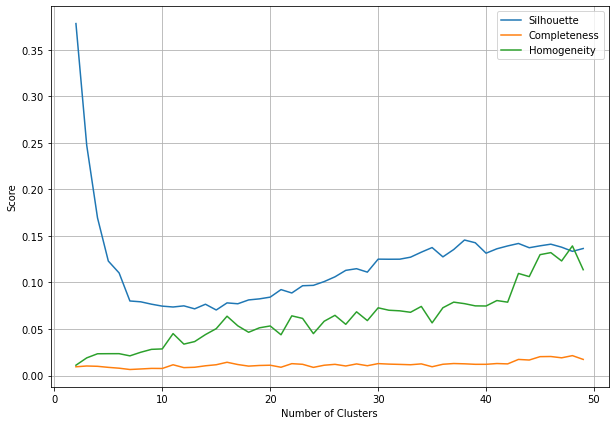

In [47]:
a = ['Silhouette', 'Completeness', 'Homogeneity']

plt.rcParams["figure.figsize"] = (10,7)
plt.plot(np.arange(2,50), silhouette)
plt.plot(np.arange(2,50), completeness)
plt.plot(np.arange(2,50), homogeneity)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend(a)
plt.grid()
plt.show()

# CLASSIFIERS

In [40]:
# Decision Tree & Naive Bayes
# Can you predict if certain entries will be recycled or not?

In [41]:
from sklearn import model_selection

In [42]:
# Split data in attributes and outcome

wasteData = data[[ 'Value', 'FeatureCode', 'DateCode', 'Waste Category']]   #attributes
#wasteData = data[[ 'Value', 'FeatureCode', 'DateCode']]   #attributes

wasteTarget = data['Waste Management']      #outcome

# Encode attributes with one-hot encoding

one_hot_wasteData = pd.get_dummies(wasteData)

In [43]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(one_hot_wasteData, wasteTarget, test_size = 0.20)

In [66]:
print("\n\nDecision Tree")
print("**************************************")
from sklearn import tree
model = tree.DecisionTreeClassifier()
#model = tree.DecisionTreeClassifier(criterion='entropy')
model = model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))



Decision Tree
**************************************
DecisionTreeClassifier()
                 precision    recall  f1-score   support

     Landfilled       0.83      0.73      0.78       162
Other Diversion       0.74      0.80      0.77       171
       Recycled       0.99      0.99      0.99      1668

       accuracy                           0.95      2001
      macro avg       0.85      0.84      0.84      2001
   weighted avg       0.95      0.95      0.95      2001

[[ 119   31   12]
 [  21  137   13]
 [   3   18 1647]]


In [67]:
## print("\n\n Naive Bayes")
print("**************************************")
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

**************************************
CategoricalNB()
                 precision    recall  f1-score   support

     Landfilled       0.74      0.24      0.36       162
Other Diversion       0.57      0.30      0.40       171
       Recycled       0.89      0.99      0.94      1668

       accuracy                           0.87      2001
      macro avg       0.73      0.51      0.57      2001
   weighted avg       0.85      0.87      0.85      2001

[[  39   29   94]
 [  14   52  105]
 [   0   10 1658]]
